In [1]:
pip install scikit-learn scikit-optimize


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data-creadit-card-fraud-dectection/creditcard.csv')

In [5]:
duplicated = df[df.duplicated()]
duplicated

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [6]:
df.drop(duplicated.index, axis=0, inplace=True)
print('Kích thước sau khi bỏ hàng lặp: %d hàng, %d cột' %df.shape)

Kích thước sau khi bỏ hàng lặp: 283726 hàng, 31 cột


In [7]:
target = 'Class'

In [8]:
X = df.loc[:, df.columns!=target]
y = df.loc[:, df.columns==target]

In [9]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [10]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [11]:
import seaborn as sns

Class
0    283253
1       473
Name: count, dtype: int64


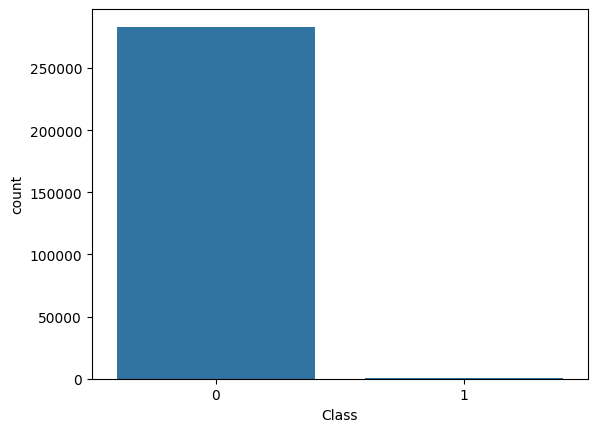

In [12]:
ax = sns.countplot(x=target, data=df)
print(df[target].value_counts())

Để tích hợp kỹ thuật tăng cường dữ liệu SVMSMOTE và thêm trọng số vào LogisticRegression trong đoạn code của bạn, bạn cần chỉnh sửa phần param_grid để bao gồm cả trọng số class_weight của LogisticRegression. Sau đây là cách cập nhật đoạn mã của bạn:

In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SVMSMOTE
from sklearn.preprocessing import StandardScaler

# Giả định X và y đã được định nghĩa trước đó và có dạng phù hợp

# Chuyển đổi y về dạng 1D
y = np.ravel(y)

# Tạo pipeline với SVMSMOTE, StandardScaler và LogisticRegression
pipe = make_pipeline(
    SVMSMOTE(),
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

# Thiết lập các trọng số để thử nghiệm
sampling_strategies = np.linspace(0.005, 0.25, 10)
class_weights = [{0: x, 1: 1.0 - x} for x in sampling_strategies]

# Cấu hình GridSearchCV
gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'svmsmote__sampling_strategy': sampling_strategies,
        'logisticregression__class_weight': class_weights
    },
    scoring='f1',
    cv=3
)

# Huấn luyện và tìm kiếm tham số tốt nhất
grid_result = gsc.fit(X, y)

# In ra tham số tốt nhất
print("Best parameters: %s" % grid_result.best_params_)

# Tạo DataFrame và vẽ đồ thị
weight_f1_score_df = pd.DataFrame({
    'score': grid_result.cv_results_['mean_test_score'],
    'sampling_strategy': sampling_strategies,
    'class_weight': [str(cw) for cw in class_weights]
})
weight_f1_score_df.plot(x='sampling_strategy', y='score')


Best parameters: {'logisticregression__class_weight': {0: 0.25, 1: 0.75}, 'svmsmote__sampling_strategy': 0.005}


ValueError: All arrays must be of the same length

Best parameters: {'logisticregression__class_weight': {0: 0.25, 1: 0.75}, 'svmsmote__sampling_strategy': 0.005}


<Axes: xlabel='sampling_strategy'>

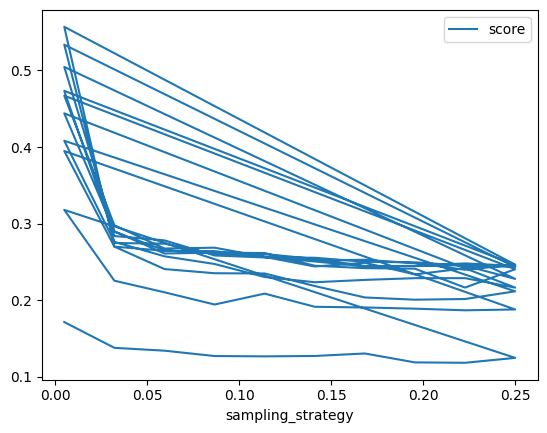

In [16]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SVMSMOTE
from sklearn.preprocessing import StandardScaler

# Giả định X và y đã được định nghĩa trước đó và có dạng phù hợp

# Chuyển đổi y về dạng 1D
y = np.ravel(y)

# Tạo pipeline với SVMSMOTE, StandardScaler và LogisticRegression
pipe = make_pipeline(
    SVMSMOTE(),
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

# Thiết lập các trọng số để thử nghiệm
sampling_strategies = np.linspace(0.005, 0.25, 10)
class_weights = [{0: x, 1: 1.0 - x} for x in sampling_strategies]

# Cấu hình GridSearchCV
gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'svmsmote__sampling_strategy': sampling_strategies,
        'logisticregression__class_weight': class_weights
    },
    scoring='f1',
    cv=3
)

# Huấn luyện và tìm kiếm tham số tốt nhất
grid_result = gsc.fit(X, y)

# In ra tham số tốt nhất
print("Best parameters: %s" % grid_result.best_params_)

# Lấy các tham số và điểm số tương ứng
mean_test_scores = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']

# Tạo DataFrame từ các tham số và điểm số
data = []
for mean_score, param in zip(mean_test_scores, params):
    data.append({
        'score': mean_score,
        'sampling_strategy': param['svmsmote__sampling_strategy'],
        'class_weight': str(param['logisticregression__class_weight'])
    })

weight_f1_score_df = pd.DataFrame(data)

# Vẽ đồ thị
weight_f1_score_df.plot(x='sampling_strategy', y='score')
